### load model resnet18 (2 classes)

In [38]:
from torchvision import models
import torch
from torch import nn

model = models.resnet18()
model.fc = nn.Linear(512, 2)
state_dict = torch.load('checkpoints\output\epoch=99-val_loss=0.00.ckpt')['state_dict'] # load state_dict
state_dict = {k.replace('model.', ''): v for k, v in state_dict.items()} # remove 'model.' prefix
model.load_state_dict(state_dict)
# inference on a single image
from torchvision.transforms.functional import to_tensor
from torchvision.utils import make_grid
from torchvision import transforms
from PIL import Image
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from matplotlib import pyplot as plt
img = Image.open('40.jpg')
img = img.resize((256, 256))
img = to_tensor(img)
img = img.unsqueeze(0)
print(img.shape)
# img = normalize(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
pred = model(img)
print(pred)

torch.Size([1, 3, 256, 256])
tensor([[-2.1382,  2.7133]], grad_fn=<AddmmBackward0>)


In [15]:
# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)


In [9]:
import os
from PIL import Image

def convert_all_tif_to_jpg(folder_path):
    # 检查输入文件夹是否存在
    if not os.path.exists(folder_path):
        print(f"文件夹 {folder_path} 不存在")
        return

    # 创建输出文件夹
    output_folder = os.path.join(folder_path, "train_jpg")
    os.makedirs(output_folder, exist_ok=True)

    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder_path):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            # 拼接完整的文件路径
            tif_path = os.path.join(folder_path, filename)
            
            # 打开并转换为灰度图（L模式）
            tif_image = Image.open(tif_path).convert('L')
            
            # 将灰度图转换为RGB模式
            rgb_image = tif_image.convert('RGB')
            
            # 生成 jpg 文件名并保存
            jpg_filename = os.path.splitext(filename)[0] + ".jpg"
            jpg_path = os.path.join(output_folder, jpg_filename)
            rgb_image.save(jpg_path, 'JPEG')
            print(f"已将 {filename} 转换为 {jpg_filename}")
        else:
            print(f"跳过非tif文件: {filename}")
    
    print("所有文件转换完成！")

# 使用例子
folder_path = 'DIC_crack_dataset/train'
convert_all_tif_to_jpg(folder_path)


已将 SVS_1_RSC3_0476_1_29_512_768.tif 转换为 SVS_1_RSC3_0476_1_29_512_768.jpg
已将 SVS_1_RSC3_0476_1_30_768_768.tif 转换为 SVS_1_RSC3_0476_1_30_768_768.jpg
已将 SVS_1_RSC3_0476_1_31_1024_768.tif 转换为 SVS_1_RSC3_0476_1_31_1024_768.jpg
已将 SVS_1_RSC3_0476_1_37_256_1024.tif 转换为 SVS_1_RSC3_0476_1_37_256_1024.jpg
已将 SVS_1_RSC3_0476_1_40_1024_1024.tif 转换为 SVS_1_RSC3_0476_1_40_1024_1024.jpg
已将 SVS_1_RSC3_0476_1_41_1280_1024.tif 转换为 SVS_1_RSC3_0476_1_41_1280_1024.jpg
已将 SVS_1_RSC3_0476_1_43_1792_1024.tif 转换为 SVS_1_RSC3_0476_1_43_1792_1024.jpg
已将 SVS_1_RSC3_0476_1_49_1024_1280.tif 转换为 SVS_1_RSC3_0476_1_49_1024_1280.jpg
已将 SVS_1_RSC3_0476_1_50_1280_1280.tif 转换为 SVS_1_RSC3_0476_1_50_1280_1280.jpg
已将 SVS_1_RSC3_0476_1_51_1536_1280.tif 转换为 SVS_1_RSC3_0476_1_51_1536_1280.jpg
已将 SVS_1_RSC3_0476_1_60_1536_1536.tif 转换为 SVS_1_RSC3_0476_1_60_1536_1536.jpg
已将 SVS_1_RSC3_0476_1_65_512_1792.tif 转换为 SVS_1_RSC3_0476_1_65_512_1792.jpg
已将 SVS_1_RSC3_0476_1_66_768_1792.tif 转换为 SVS_1_RSC3_0476_1_66_768_1792.jpg
已将 SVS_1_RSC3_0

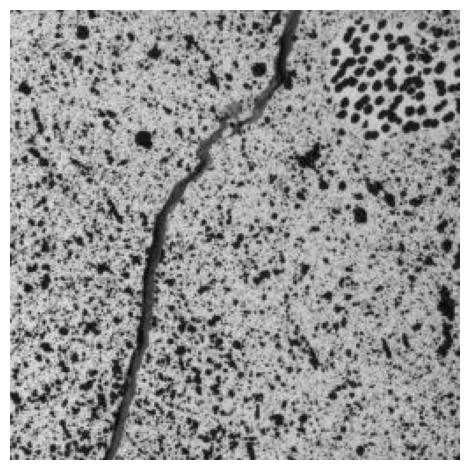

In [140]:
from torchvision.io.image import read_image
import matplotlib.pyplot as plt

img = read_image("SVS_2_LS18_to_LS19_RS2_0000_1_173_2816_2304.jpg")
# show the img
plt.imshow(img.permute(1, 2, 0)); plt.axis('off'); plt.tight_layout(); plt.show()

C:\Users\lawsonXiao\AppData\Local\Temp\ipykernel_6452\4021544970.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoints/output/ep

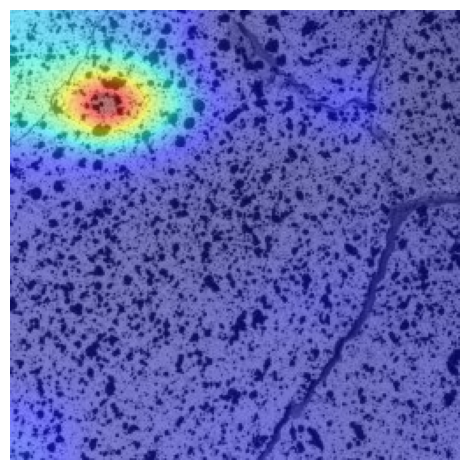

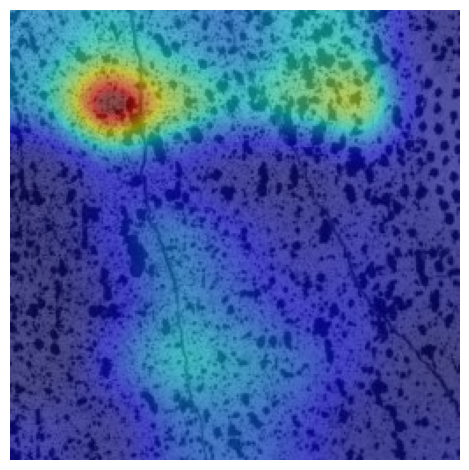

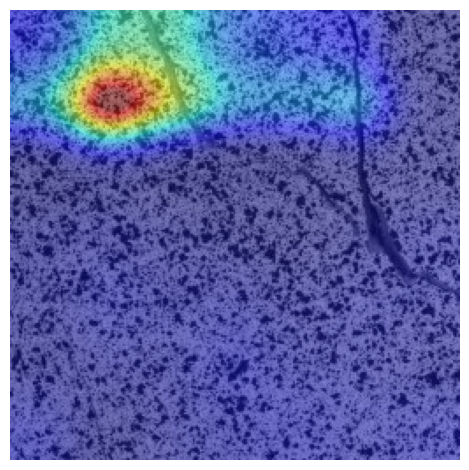

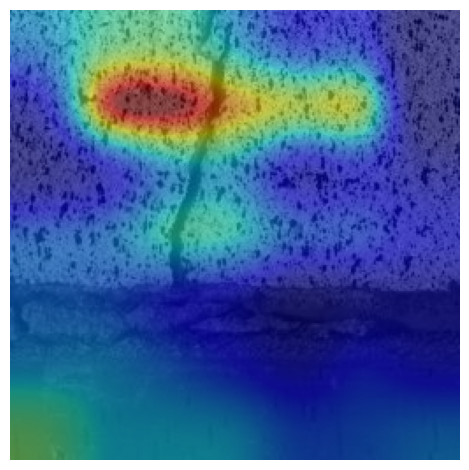

In [25]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp,GradCAM , GradCAMpp, ScoreCAM,LayerCAM, SSCAM,GradCAMpp, ISCAM, XGradCAM
import cv2 as cv
from torch import nn
import os

for img_path in os.listdir('test_img'):
    img = read_image(os.path.join('test_img', img_path))
    # Preprocess it for your chosen model
    input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    model = resnet18(pretrained=True)
    model.fc = nn.Linear(512, 2)
    model.load_state_dict(torch.load('checkpoints/output/epoch=99-val_loss=0.00.ckpt'))
    model.eval()  # Set the model to evaluation mode after loading

    cam_extractor = ScoreCAM(model, 'layer4')
    out=(model(input_tensor.unsqueeze(0)))
    activation_map=(cam_extractor(out.squeeze(0).argmax().item(), out))

    import matplotlib.pyplot as plt
    from torchcam.utils import overlay_mask

    # Resize the CAM and overlay it
    result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
    # Display it
    plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()


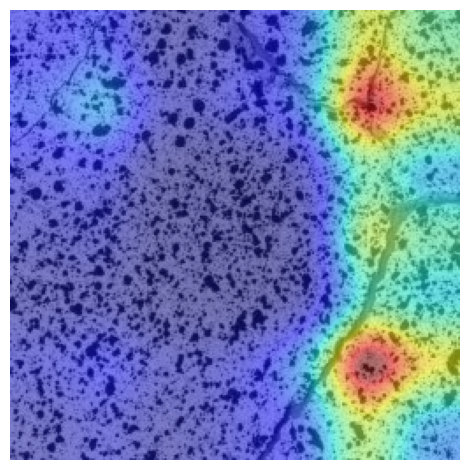

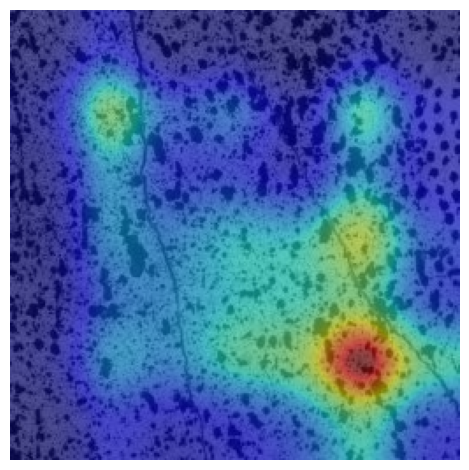

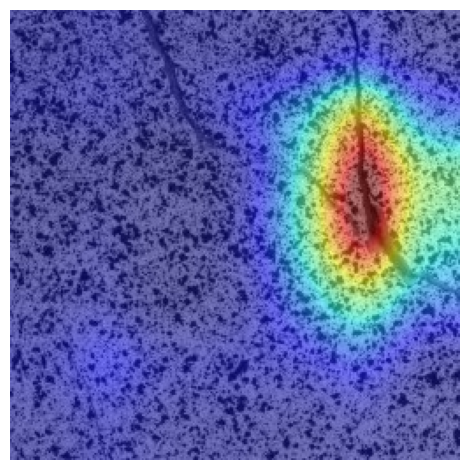

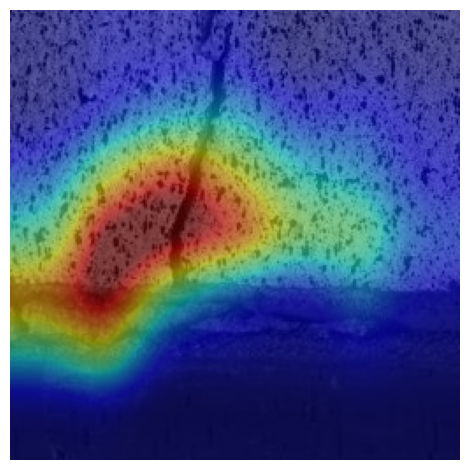

In [23]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp,GradCAM , GradCAMpp, ScoreCAM,LayerCAM, SSCAM,GradCAMpp, ISCAM, XGradCAM
import cv2 as cv
from torch import nn
import os

for img_path in os.listdir('test_img'):
    img = read_image(os.path.join('test_img', img_path))
    # Preprocess it for your chosen model
    input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    model = resnet18(pretrained=True)
    # model.fc = nn.Linear(512, 2)
    # model.load_state_dict(torch.load('checkpoints/output/epoch=99-val_loss=0.00.ckpt'))
    model.eval()  # Set the model to evaluation mode after loading

    cam_extractor = GradCAM(model, 'layer4')
    out=(model(input_tensor.unsqueeze(0)))
    activation_map=(cam_extractor(out.squeeze(0).argmax().item(), out))

    import matplotlib.pyplot as plt
    from torchcam.utils import overlay_mask

    # Resize the CAM and overlay it
    result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
    # Display it
    plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()


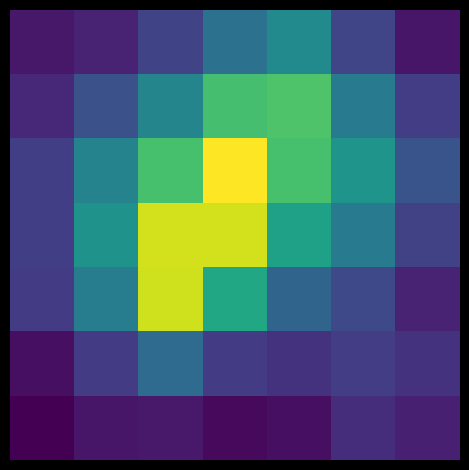

In [16]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

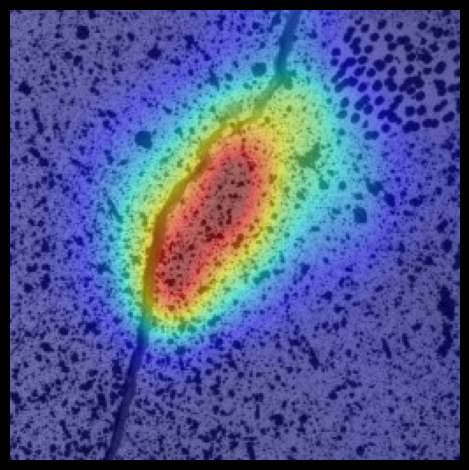

In [17]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [3]:
import torch
import numpy as np
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet34, vgg11
from torchcam.methods import GradCAM
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
from PIL import Image
import random
from PIL import ImageDraw
import cv2 as cv
from torch import nn

# Step 1: 读取图像，进行预处理
img = read_image("SVS_1_SC5_LS28_to_LS29_0000_1_49_1024_1280.jpg")
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Step 2: 加载预训练的模型并进行推理
model = resnet18(pretrained=True)
# model.fc = nn.Linear(512, 2)
# model.load_state_dict(torch.load('crack_resnet18_model.pth'))
model.eval()  # Set the model to evaluation mode after loading
cam_extractor = GradCAM(model, 'layer4')
out = model(input_tensor.unsqueeze(0))

# Step 3: 获取注意力热图
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

# Step 4: 确保热图归一化的正确性
heatmap = activation_map[0].squeeze(0).detach().numpy()

# 平滑热图值，避免采样概率过于分散，增强高温区的采样概率
heatmap = np.clip(heatmap, 0, None)  # 去掉负值
heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())  # 归一化

# Step 5: 将热图恢复到原图尺寸
heatmap_resized = cv.resize(heatmap, (img.shape[2], img.shape[1]))

# Step 6: 重新定义采样逻辑，确保高温区有更高采样概率
def sample_points(heatmap, num_points=5):
    height, width = heatmap.shape
    flat_heatmap = heatmap.flatten()

    # 增加高温区域的权重偏移，以确保高温区域采样概率更高
    flat_heatmap = np.power(flat_heatmap, 30)  # 通过指数提升热图值的权重，使高温区更显著

    probabilities = flat_heatmap / flat_heatmap.sum()  # 归一化为概率分布
    indices = np.arange(len(flat_heatmap))

    # 采样点的索引
    sampled_indices = np.random.choice(indices, size=num_points, replace=False, p=probabilities)

    # 将平面索引转换为坐标
    sampled_coords = [(index % width, index // width) for index in sampled_indices]

    return sampled_coords

# Step 7: 获取采样点
sampled_points = sample_points(heatmap_resized, num_points=1)
print(sampled_points)
# Step 8: 可视化采样点
result_image = to_pil_image(img)
draw = ImageDraw.Draw(result_image)
for (x, y) in sampled_points:
    draw.ellipse([(x-3, y-3), (x+3, y+3)], outline="red", width=2)  # 半径为3的圆圈

# Display results
plt.imshow(result_image)
# plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'torch'

In [98]:
# 安装 SAM 的依赖包
# pip install git+https://github.com/facebookresearch/segment-anything.git

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw
from segment_anything import sam_model_registry, SamPredictor
from torchvision.transforms.functional import to_pil_image

# Step 1: 从上一步得到的 `sampled_points`
# 假设 sampled_points 已经从之前的步骤中获取

# Step 2: 加载预训练的 SAM 模型
# 你需要提供模型的权重路径 "sam_vit_h_4b8939.pth"
sam_checkpoint = "sam_vit_h_4b8939.pth"  # 替换成你自己的模型权重路径
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# Step 3: 加载图像，并准备为 SAM 提供输入
image = to_pil_image(img)  # 将原图转为PIL格式
predictor.set_image(np.array(image))

# 将之前采样的 points 转换为适合 SAM 输入的格式
input_points = np.array(sampled_points)
input_labels = np.ones(input_points.shape[0])  # 将所有点标记为前景点 (label=1)

# Step 4: 使用 SAM 模型进行分割
masks, scores, _ = predictor.predict(
    point_coords=input_points,  # 提供采样点作为提示
    point_labels=input_labels,  # 所有点都作为前景点
    multimask_output=False  # 是否生成多个候选掩码
)

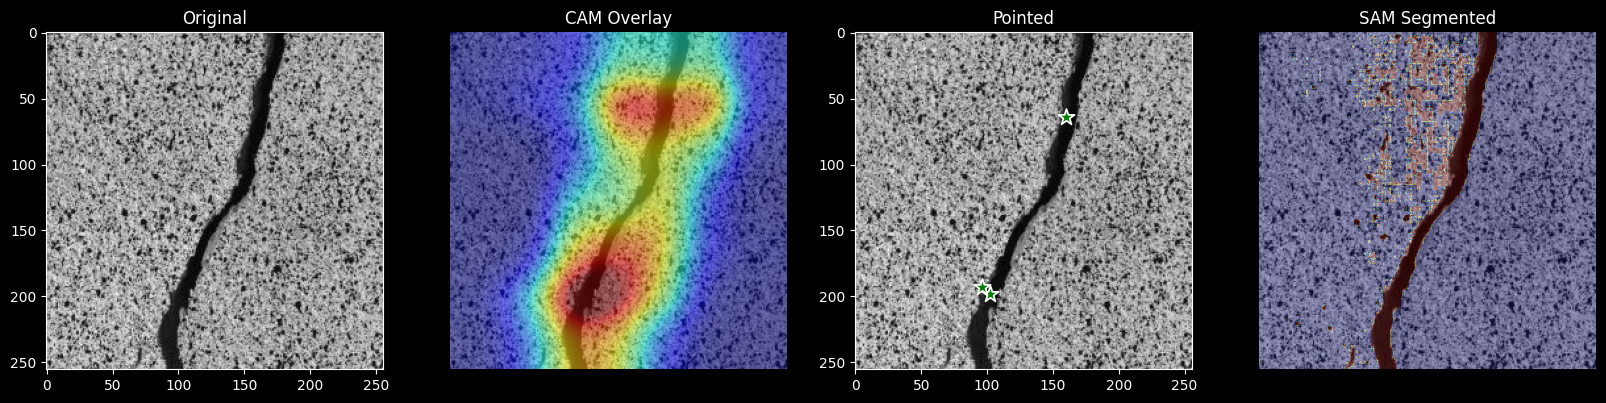

In [106]:
def show_points(coords, labels, ax, marker_size=150):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)  
    
# Step 5: 可视化分割结果
plt.figure(figsize=(20, 20))

# 显示原图
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original')

# 显示分割后的图像
plt.subplot(1, 4, 4)
plt.imshow(image)
plt.imshow(masks[0], cmap='jet', alpha=0.3)  # 使用半透明的掩码叠加到原图上
plt.axis('off')
plt.title('SAM Segmented')


# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.subplot(1, 4, 2)
plt.imshow(result)
plt.title('CAM Overlay')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(image)
show_points(input_points, input_labels, plt.gca())
plt.title('Pointed')    
plt.show()

In [30]:
input_points = np.array(sampled_points)
input_points

array([[ 49, 128]])

In [31]:
input_labels = np.ones(input_points.shape[0]) 
input_labels
c

array([1.])

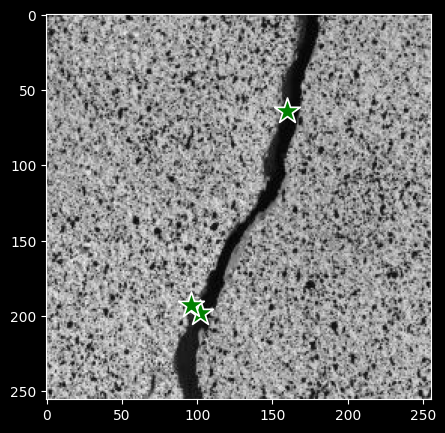

In [82]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

plt.figure(figsize=(5,5))
plt.imshow(image)
show_points(input_points, input_labels, plt.gca())
plt.axis('on')
plt.show()    

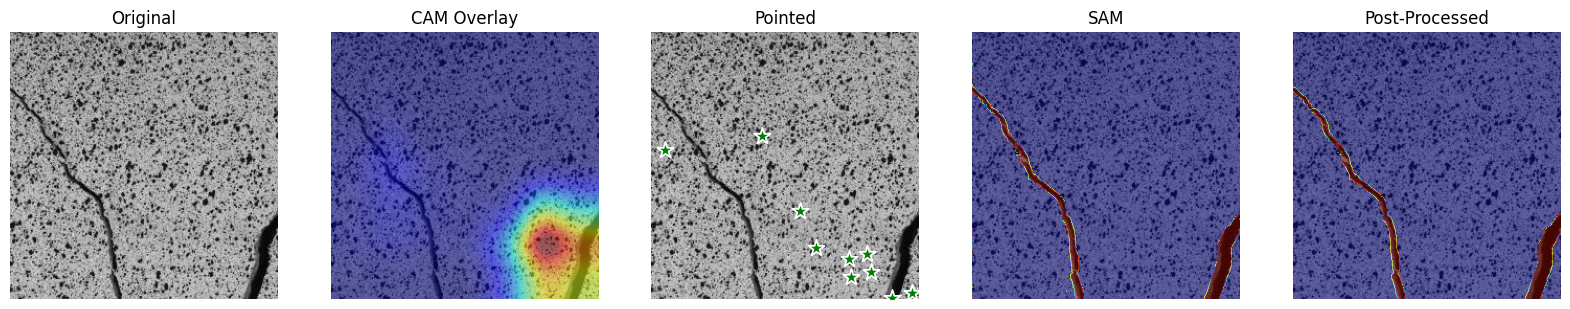

In [2]:
import torch
import random
import cv2 as cv
import numpy as np
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import CAM, GradCAM, ScoreCAM,LayerCAM, SSCAM,GradCAMpp, ISCAM, XGradCAM, SmoothGradCAMpp
from torchcam.utils import overlay_mask


from segment_anything import sam_model_registry, SamPredictor
from torchvision.transforms.functional import to_pil_image
from torch import nn

import matplotlib.pyplot as plt

# Step 0: 设置seed
def set_seed(seed):
    """
    为所有涉及到的库设置随机种子，以确保结果的可复现性。
    """
    # Python built-in random seed
    random.seed(seed)
    
    # NumPy random seed
    np.random.seed(seed)
    
    # PyTorch random seed (for CPU and GPU)
    torch.manual_seed(seed)
    
    # If you are using GPU and want deterministic behavior
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if using multi-GPU

    # Ensuring deterministic behavior in PyTorch (may slow down performance slightly)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 调用函数，设置全局随机种子
set_seed(3407)

# Step 1: 读取图像，进行预处理
img = read_image("SVS_1_SC4_LS28_to_LS29_0000_0_39_768_1024.jpg")
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Step 2: 加载预训练的模型并进行推理
model = resnet18(pretrained=True)
# model.fc = nn.Linear(512, 2)
# model.load_state_dict(torch.load('checkpoints/output/epoch=99-val_loss=0.00.ckpt'))
model.eval()  # Set the model to evaluation mode after loading
cam_extractor = GradCAM(model, 'layer4')
out = model(input_tensor.unsqueeze(0))

# Step 3: 获取注意力热图
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

# Step 4: 确保热图归一化的正确性
heatmap = activation_map[0].squeeze(0).detach().numpy()

# 平滑热图值，避免采样概率过于分散，增强高温区的采样概率
heatmap = np.clip(heatmap, 0, None)  # 去掉负值
heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())  # 归一化

# Step 5: 将热图恢复到原图尺寸
heatmap_resized = cv.resize(heatmap, (img.shape[2], img.shape[1]))

# Step 6: 定义采样逻辑，确保高温区有更高采样概率
def sample_points(heatmap, num_points=10, weight_exponent=1):
    height, width = heatmap.shape
    flat_heatmap = heatmap.flatten()

    # 增加高温区域的权重偏移，以确保高温区域采样概率更高
    flat_heatmap = np.power(flat_heatmap, weight_exponent)  # 通过指数提升热图值的权重，使高温区更显著

    probabilities = flat_heatmap / flat_heatmap.sum()  # 归一化为概率分布
    indices = np.arange(len(flat_heatmap))

    # 采样点的索引
    sampled_indices = np.random.choice(indices, size=num_points, replace=False, p=probabilities)

    # 将平面索引转换为坐标
    sampled_coords = [(index % width, index // width) for index in sampled_indices]

    return sampled_coords

# Step 7: 获取采样点
sampled_points = sample_points(heatmap_resized, num_points=10, weight_exponent=1)

# Step 8: 加载预训练的 SAM 模型
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# Step 9: 加载图像，并准备为 SAM 提供输入
image = to_pil_image(img)  # 将原图转为PIL格式
predictor.set_image(np.array(image))

# 将之前采样的 points 转换为适合 SAM 输入的格式
input_points = np.array(sampled_points)
input_labels = np.ones(input_points.shape[0])  # 将所有点标记为前景点 (label=1)

# Step 10: 使用 SAM 模型进行分割
masks, scores, _ = predictor.predict(
    point_coords=input_points,  # 提供采样点作为提示
    point_labels=input_labels,  # 所有点都作为前景点
    multimask_output=False  # 是否生成多个候选掩码
)
# masks 包含 True or False，表示每个像素是否属于前景
# 判断图片中黑白区域的大小， 如果白色区域大，则将预测结果取反

# 计算前景点（True）的数量
foreground_count = np.sum(masks)
# 计算背景点（False）的数量
background_count = np.size(masks) - foreground_count
# 如果前景点数量大于背景点数量，则对 masks 进行取反
if foreground_count > background_count:
    masks = np.logical_not(masks)

# Step 12: 对 SAM 生成的掩码进行后处理
def post_process_mask(mask):
    # Convert mask to uint8 for OpenCV operations
    mask = (mask * 255).astype(np.uint8)

    # 形态学开运算 (Opening) 去除小噪声点 (先腐蚀再膨胀)
    kernel = np.ones((3, 3), np.uint8)  # 定义一个5x5的内核，您可以根据需要调整
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
    # 形态学闭运算 (Closing) 填充小的黑色空洞 (先膨胀再腐蚀)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    # 查找轮廓
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    # 设置保留的最小轮廓面积
    min_area = 100
    max_area = 15000
    # 创建一个新的空白图像来绘制筛选后的轮廓
    filtered_image = np.zeros_like(mask)
    # 遍历每个轮廓并计算面积
    for contour in contours:
        area = cv.contourArea(contour)
        # 根据面积过滤轮廓，保留面积大于min_area，小于max_area的轮廓
        if min_area < area < max_area:
            cv.drawContours(filtered_image, [contour], -1, 255, thickness=cv.FILLED)

    return filtered_image

processed_mask = post_process_mask(masks[0])

    
# Step 12: 可视化分割结果
def show_points(coords, labels, ax, marker_size=150):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    
plt.figure(figsize=(20, 50))

# 显示原图
plt.subplot(1, 5, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original')

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
plt.subplot(1, 5, 2)
plt.imshow(result)
plt.title('CAM Overlay')
plt.axis('off')

# 显示采样点
plt.subplot(1, 5, 3)
plt.imshow(image)
show_points(input_points, input_labels, plt.gca())
plt.axis('off')
plt.title('Pointed')    


# 显示分割后的图像
plt.subplot(1, 5, 4)
plt.imshow(image)
plt.imshow(masks[0], cmap='jet', alpha=0.5)  # 使用半透明的掩码叠加到原图上
plt.axis('off')
plt.title('SAM')

# 显示后处理后的掩码
plt.subplot(1, 5, 5)
plt.imshow(image)
plt.imshow(processed_mask, cmap='jet', alpha=0.5)  # 叠加处理后的掩码
plt.axis('off')
plt.title('Post-Processed')
plt.show()


In [10]:
ckpt = torch.load('checkpoints/output/epoch=99-val_loss=0.00.ckpt')
# remove "model." from the state_dict keys
ckpt = ckpt['state_dict']
ckpt = {k.replace("model.", ""): v for k, v in ckpt.items()}
# save 
torch.save(ckpt, 'checkpoints/output/epoch=99-val_loss=0.00.ckpt')


C:\Users\lawsonXiao\AppData\Local\Temp\ipykernel_24516\958533399.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('checkpoints/output/epoch=99-val_loss=